# Project 1

### Part a: Ordinary Least Square (OLS) for the Runge function

In [56]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [57]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

In [58]:
n = 100
x = np.random.uniform(-1, 1, n)
y = f(x) + 0.025*np.random.normal(0, 1, n)

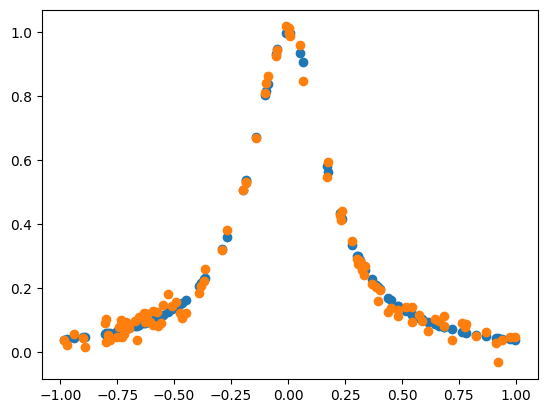

In [59]:
plt.scatter(x, f(x)) 
plt.scatter(x, y)
plt.show()

In [60]:
def OLS_parameters(X, y):
    X_transpose = np.transpose(X)
    return np.linalg.pinv(X_transpose @ X) @ X_transpose @ y

def Ridge_parameters(X, y, lambda_reg = 0.1):
    pred = X.shape[1]
    I = np.eye(pred) # size: (p,p)

    return np.linalg.inv((X.T @ X)+I*lambda_reg) @ X.T @ y

In [61]:
def polynomial_features(x, p, intercept = False):
    n = len(x)
    if intercept:
        X = np.zeros((n,p+1))
        for i in range(p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1, p + 1):
            X[:, i - 1] = x ** i
    return X

In [62]:
def MSE(y, y_pred):
    return 1/n * np.sum((y-y_pred)**2)

def R2(y, y_pred):
    return 1 - np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)

In [63]:
MAX_POLYNOMIAL_DEGREE = 20
MIN_POLYNOMIAL_DEGREE = 2

#mse_values = np.zeros(MAX_POLYNOMIAL_DEGREE-MIN_POLYNOMIAL_DEGREE+1)
#r2_values = np.zeros(MAX_POLYNOMIAL_DEGREE-MIN_POLYNOMIAL_DEGREE+1)

polynomial_degrees = list(range(MIN_POLYNOMIAL_DEGREE, MAX_POLYNOMIAL_DEGREE+1))

def MSE_and_R2(x,polynomial_degrees,regression_type="OLS",lamb = 0.0): 
    mse_values = np.zeros(polynomial_degrees[-1] - polynomial_degrees[0]+1)
    r2_values = np.zeros(polynomial_degrees[-1] - polynomial_degrees[0]+1)
    for p in polynomial_degrees:
        X = polynomial_features(x, p)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_offset = np.mean(y_train)
        if regression_type == "OLS": 
            theta = OLS_parameters(X_train_s, y_train - y_offset)
        else: 
            theta = Ridge_parameters(X_train_s, y_train - y_offset,lambda_reg = lamb)
        y_pred = X_test_s @ theta + y_offset
        ols_mse = MSE(y_test, y_pred)
        ols_r2 = R2(y_test, y_pred)
        mse_values[p-polynomial_degrees[0]] = ols_mse
        r2_values[p-polynomial_degrees[0]] = ols_r2
    return mse_values,r2_values
        

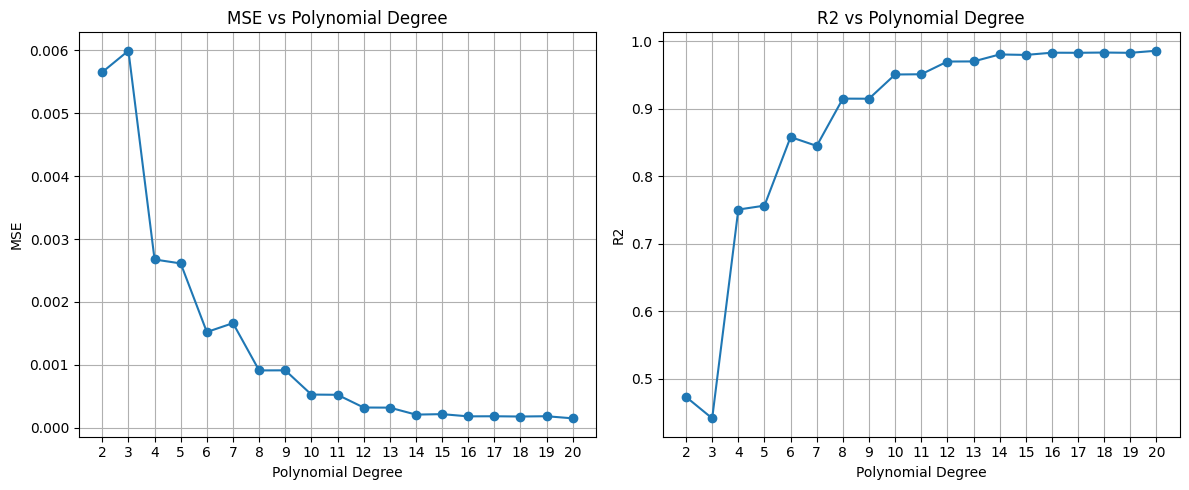

In [64]:
# Plot the MSE and R2 values

mse_values,r2_values = MSE_and_R2(x,polynomial_degrees)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(polynomial_degrees, mse_values, marker='o')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.xticks(polynomial_degrees)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(polynomial_degrees, r2_values, marker='o')
plt.title('R2 vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.xticks(polynomial_degrees)
plt.grid()

plt.tight_layout()
plt.show()

### Exercise 1b) 

We now attempt the Ridge regression model. We use different values of lambda, and plot the MSE and R2 as a function of polynomial degree, both using graphs and heatmaps. 

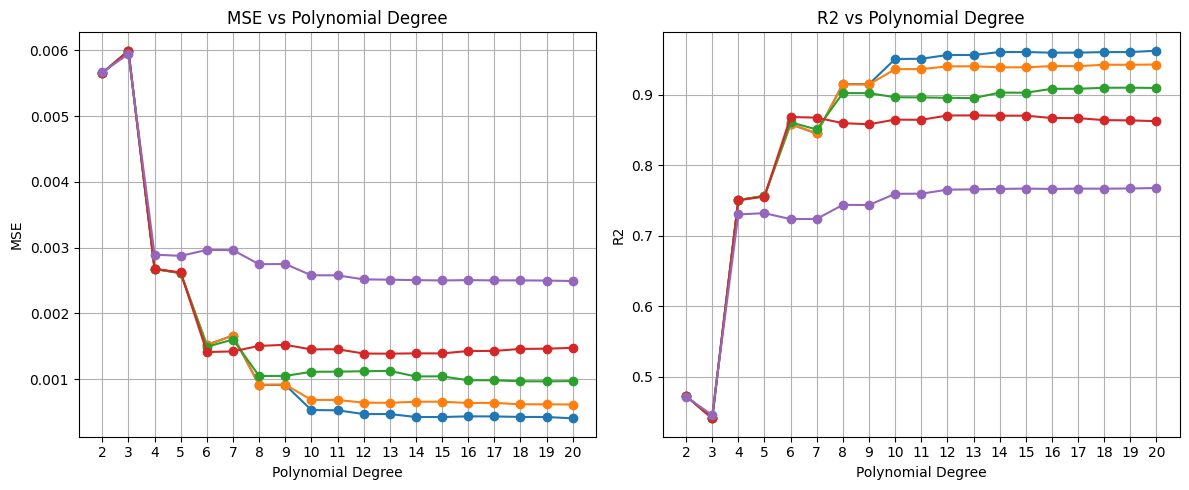

In [65]:
lamb = 10**(np.linspace(-5,0,5))

plt.figure(figsize=(12,5))

for i in range(len(lamb)): 
    mse_values,r2_values = MSE_and_R2(x,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    plt.subplot(1, 2, 1)
    plt.plot(polynomial_degrees, mse_values, marker='o')
    plt.title('MSE vs Polynomial Degree')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('MSE')
    plt.xticks(polynomial_degrees)
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(polynomial_degrees, r2_values, marker='o')
    plt.title('R2 vs Polynomial Degree')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R2')
    plt.xticks(polynomial_degrees)
    plt.grid()

plt.tight_layout()
plt.show()

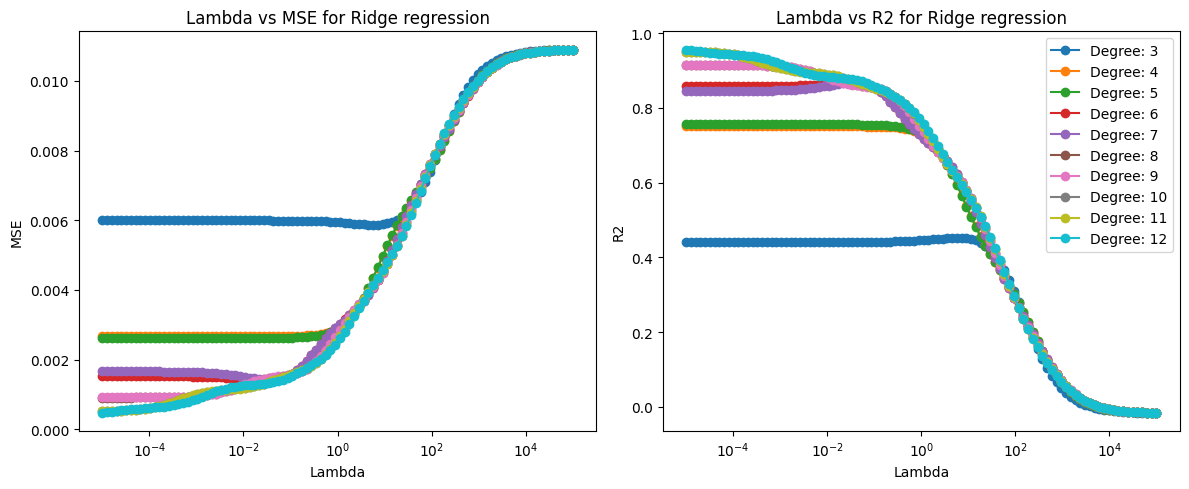

In [66]:
lamb = 10**(np.linspace(-5,5,100))

polynomial_degrees = list(range(3, 12+1))

mse = np.zeros((polynomial_degrees[-1] - polynomial_degrees[0]+1,len(lamb)))
r2 = mse.copy()

for i in range(len(lamb)): 
    mse_values,r2_values = MSE_and_R2(x,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    mse[:,i] = mse_values
    r2[:,i] = r2_values

plt.figure(figsize=(12,5))

for j in range(len(polynomial_degrees)): 
    plt.subplot(1, 2, 1)
    plt.semilogx(lamb, mse[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")
    plt.title('Lambda vs MSE for Ridge regression')
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.semilogx(lamb, r2[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")
    plt.title('Lambda vs R2 for Ridge regression')
    plt.xlabel('Lambda')
    plt.ylabel('R2')
    plt.grid()

plt.legend()
plt.tight_layout()
plt.show()
    
